# Using titanic data set to predict survivability rate of passengers

This mini-project uses the titanic ship disaster data records to check if another similar
anomaly had occurred at that time what chance of surviving the passengers had.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

## Insert the file path as first paramter below

In [3]:
df = pd.read_csv('', sep='\t', engine='python')

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
cols_to_drop = ['Name', 'Ticket', 'Cabin']
df = df.drop(cols_to_drop, axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Sex          156 non-null    object 
 4   Age          126 non-null    float64
 5   SibSp        156 non-null    int64  
 6   Parch        156 non-null    int64  
 7   Fare         156 non-null    float64
 8   Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 11.1+ KB


<AxesSubplot:>

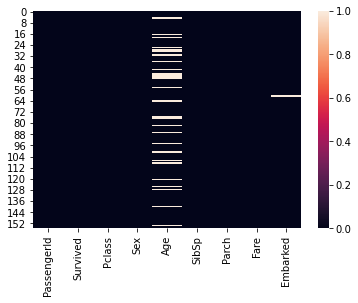

In [7]:
df.info()
sb.heatmap(df.isnull())

## Pre-processing missing values.

<AxesSubplot:>

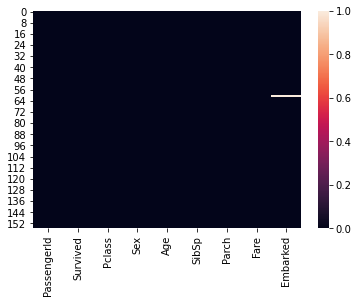

In [8]:
df['Age'] = df['Age'].interpolate()
sb.heatmap(df.isnull())

In [9]:
df = df.dropna()

In [10]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


## Creating dummy columns to convert to numeric data type.

In [11]:
Boarded= pd.get_dummies(df['Embarked'])
Gender = pd.get_dummies(df['Sex'])

Adding dummy columns to original data set.

In [12]:
df = pd.concat((df, Boarded, Gender), axis=1)

Dropping original columns.

In [13]:
df = df.drop(['Sex','Embarked'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  155 non-null    int64  
 1   Survived     155 non-null    int64  
 2   Pclass       155 non-null    int64  
 3   Age          155 non-null    float64
 4   SibSp        155 non-null    int64  
 5   Parch        155 non-null    int64  
 6   Fare         155 non-null    float64
 7   C            155 non-null    uint8  
 8   Q            155 non-null    uint8  
 9   S            155 non-null    uint8  
 10  female       155 non-null    uint8  
 11  male         155 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 10.4 KB


In [14]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1


## Seperating the dataframe into X and y data

In [15]:
X = df.values
y = df['Survived'].values

Delete the Survived column from X

In [16]:
X = np.delete(X,1,axis=1)

## Split the dataset into 70% Training and 30% Test

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

## Using Decision Tree classifier

Training the dataset and making prediction

In [36]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.7872340425531915

## K Fold Cross Validation

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dt_clf = tree.DecisionTreeClassifier()
kfold_validation=KFold(10)
cvs=cross_val_score(dt_clf, X, y, cv=kfold_validation)
#cvs has 10 cross validation scores
print(cvs)
print(np.mean(cvs))

[0.5625     0.6875     0.6875     0.75       0.6875     0.8
 0.66666667 0.66666667 0.6        0.8       ]
0.6908333333333332


## Leave One Out Cross Validation

In [34]:
from sklearn.model_selection import LeaveOneOut
dt_clf = tree.DecisionTreeClassifier()
loov=LeaveOneOut()
loov_scores=cross_val_score(dt_clf, X, y, cv=loov)
print(np.mean(loov_scores))

0.6838709677419355


## Confusion Matrix

In [37]:
y_pred = dt_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[31,  4],
       [ 6,  6]], dtype=int64)

Creating data frame labels

In [38]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)

array([0, 1], dtype=int64)

Combining the labels with confusion matrix

In [39]:
def plot(y_train, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_train, y_pred), columns=column, index=indices)
    return table
plot(y_test, y_pred)

,Predicted 0,Predicted 1
Actual 0,31,4
Actual 1,6,6


## Colourful heatmap

<AxesSubplot:>

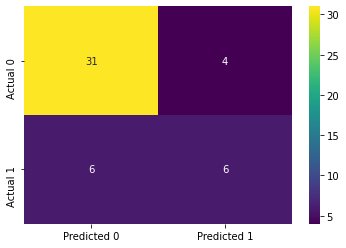

In [40]:
def plot2(y_train, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_train, y_pred), columns=column, index=indices)
    return sb.heatmap(table, annot=True, fmt='d', cmap='viridis')
plot2(y_test, y_pred)

## Using Random Forest Classifer

In [41]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test, y_test)

0.7872340425531915

## Using gradient bosster classifer

In [42]:
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_clf.score(X_test, y_test)

0.7021276595744681

After tuning the gradient booster.

In [43]:
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=50)
gb_clf.fit(X_train,y_train)
gb_clf.score(X_test, y_test)

0.7446808510638298

## Using Naive-Bayes classifer.

In [44]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_clf.score(X_test, y_test)

0.7659574468085106

## Using K-Nearest Neigbours classifer.

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.574468085106383